In [2]:
'''
姓名:刘佳昌
班级：5班
学号：2016011565
内容：Clustering Schoolwork
'''   

'\n姓名:刘佳昌\n班级：5班\n学号：2016011565\n内容：Clustering Schoolwork\n'

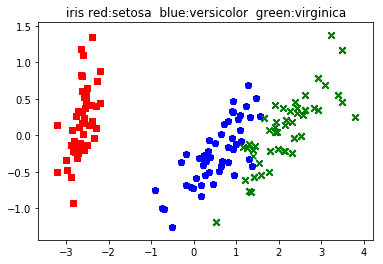

In [8]:
###1.将鸢尾花数据集画成图的形式
## 将数据变为2维，输出到图上
import matplotlib.pyplot as plt
#加载matplotlib用于数据的可视化
from sklearn.decomposition import PCA
#加载PCA算法包
from sklearn.datasets import load_iris
%matplotlib inline
#加载鸢尾花数据集导入函数
data = load_iris()
#以字典形式加载鸢尾花数据集
y = data.target #使用y表示数据集中的标签
X = data.data #使用X表示数据集中的属性数据
def pca_data():    
    pca = PCA(n_components=2)
    #加载PCA算法，设置降维后主成分数目为2
    reduced_X = pca.fit_transform(X)
    #对原始数据进行降维，保存在reduced_X中
    #print(reduced_X.shape)
    return reduced_X
def image(reduced_X):
    red_x, red_y = [], []
    #第一类数据点
    blue_x, blue_y = [], []
    #第二类数据点
    green_x, green_y = [], []
    #第三类数据点
    for i in range(len(reduced_X)):
        if y[i] == 0:
            red_x.append(reduced_X[i][0])
            red_y.append(reduced_X[i][1])
        elif y[i] == 1:
            blue_x.append(reduced_X[i][0])
            blue_y.append(reduced_X[i][1])
        else:
            green_x.append(reduced_X[i][0])
            green_y.append(reduced_X[i][1])
            plt.title("iris red:"+data.target_names[0]+"  blue:"+data.target_names[1]+"  green:"+data.target_names[2])
            plt.scatter(red_x, red_y, c='r', marker='s')
            #第一类数据点
            plt.scatter(blue_x, blue_y, c='b', marker='p')
            #第二类数据点
            plt.scatter(green_x, green_y, c='g', marker='x')
            #第三类数据点
    plt.savefig("iris.jpg")
            #保存
    plt.show()
            #可视化
if __name__ =='__main__':
    train = pca_data()            
    image(train)

In [9]:
##2.确定一个合适的阈值，只有两个样本之间的相似度大于该阈值时，这两个样本之间才有一条边。
##3.求取带权邻接矩阵。
from sklearn.datasets import load_iris
#加载鸢尾花数据集导入函数
import numpy as np
data = load_iris()
#以字典形式加载鸢尾花数据集
y = data.target #使用y表示数据集中的标签
X = data.data #使用X表示数据集中的属性数据
#距离矩阵
def M(x1, x2):
    res = np.sum((x1-x2)**2)
    res = np.sqrt(res)
    #print(res)
    return res

def D(X):
    X = np.array(X)
    S = np.zeros((len(X), len(X)))
    for i in range(150):
        for j in range(i+1,150):
            S[i][j] = M(X[i], X[j])
            S[j][i] = S[i][j]
    #print(S)
    return S

#邻接矩阵
def myKNN(S, k, sigma=0.187):
    N = len(S)
    A = np.zeros((N,N))
    for i in range(N):
        dist_with_index = zip(S[i], range(N))
              
        dist_with_index = sorted(dist_with_index, key=lambda x:x[0])#排序
        #print(dist_with_index)
        neighbours_id = [dist_with_index[m][1] for m in range(k+1)] # xi's k nearest neighbours
        #print(neighbours_id)
        for j in neighbours_id: # xj is xi's neighbour
            A[i][j] = np.exp(-S[i][j]/2/sigma/sigma)
            #print(A[i][j])
            A[j][i] = A[i][j] # mutually
    #print(A)
    return A
if __name__ =='__main__': 
    length=D(X)
    ## 距离矩阵
    print(length)
    L=myKNN(length,10)
    ## 根据k近邻算法求得邻接矩阵 k=10
    print(L)

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.37115934e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.37115934e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.48620794e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.48620794e-04
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.000

In [13]:
##4.根据邻接矩阵进行聚类。
from sklearn.cluster import KMeans
## 导入k均值模型
## 拉普拉斯矩阵
def Lpls(x):
    # 度矩阵: D=sum(A)
    d = np.sum(x, axis=1)
    #print(d)
    # 拉普拉斯矩阵: L=D-A
    lpls = np.diag(d) - x
    #print(lpls)
    ## 标准化拉普拉斯矩阵 
    sqrtDegreeMatrix = np.diag(1.0 / (d ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, lpls), sqrtDegreeMatrix)
#K_means
def spKmeans(H):
    sp_kmeans = KMeans(n_clusters=3,n_init=13,random_state =17).fit(H)
    #print(sp_kmeans.labels_)
    return sp_kmeans
if __name__ =='__main__':
    lpls=Lpls(L)
    #print(lpls)
    # 求矩阵特征值和特征向量
    lam, H = np.linalg.eig(lpls)
    lam = np.array(lam,dtype = np.float32)
    H=np.array(H,dtype = np.float32)
    #排序 选取前9组向量并转置
    lam=zip(lam,range(len(lam)))
    lam=sorted(lam,key=lambda lam:lam[0])
    H=np.vstack([H[:,i]for v,i in lam[:9]]).T
    #print(H.shape)
    # 矩阵标准化 根据最大值和最小值，减小误差
    for l in range(len(H)):
        Hmax,Hmin=H[l].max(),H[l].min()
        for j in range(len(H[l])):
            H[l][j]=(H[l][j]-Hmin)/(Hmax-Hmin)
    result=spKmeans(H)
    print(result.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 2 2 1 2 2 1 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


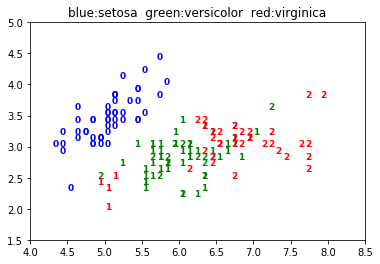

In [14]:
##5.将聚类结果可视化，重新转换成图的形式，其中每一个簇应该用一种形状表示，比如分别用圆圈、三角和矩阵表示各个簇。
labels = result.labels_#样本点被分配到的簇的索引
#画出聚类结果，每一类用一种颜色
colors = ['b','g','r']
n_clusters = 3
for i in range(n_clusters):
    index = np.nonzero(labels==i)[0]
    x0 = X[index,0]
    x1 = X[index,1]
    y_i = y[index]
    for j in range(len(x0)):
        plt.text(x0[j],x1[j],str(int(y_i[j])),color=colors[i],fontdict={'weight': 'bold', 'size': 9})
plt.title("blue:"+str(data.target_names[0])+"  green:"+str(data.target_names[1])+"  red:"+str(data.target_names[2]))
plt.axis([4,8.5,1.5,5])
plt.savefig("result.jpg")
plt.show()


In [15]:
## 6.正确率
def acc(labels):
    acc=0
    # 矩阵排列为 0 .... 1 .... 2
    for i in range(50):
        if labels[i]==0:
            acc+=1
    for i in range(50,100):
        if labels[i]==1:
            acc+=1
    for i in range(100,150):
        if labels[i]==2:
            acc+=1
    print(acc/150*100,"%")
if __name__ == '__main__':
    acc(labels)

87.33333333333333 %
